# KMeans clustering
## Instructions
Write and test your own function `KMeans` clustering algorithm, which takes as input samples `X` as 2D NumPy array assigns them to `n_clusters` different clusters. Predict cluster labels and calculate the cluster centers based on K-Means.
# Imports

In [30]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

from utils.knn import KMeans

# Simple use case

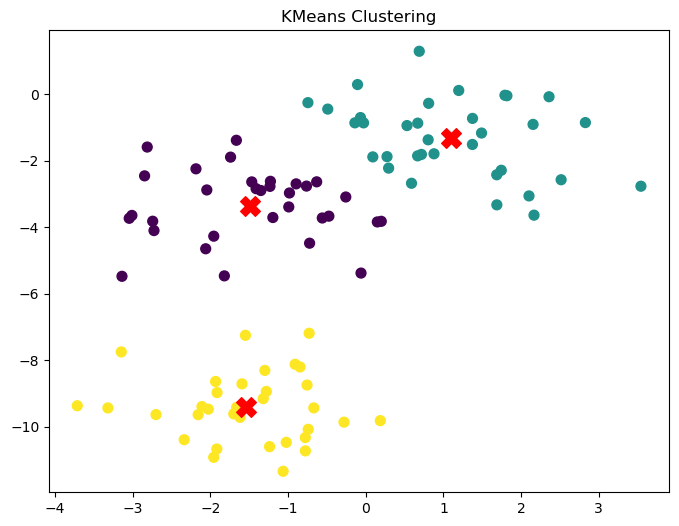

In [31]:
### Generate data
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1, random_state=2)

### Instantiate KMeans
k_means = KMeans(n_clusters=3)

### Predict clusters
y_pred = k_means.fit_predict(X)

### Plot clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(k_means.centroids[:, 0], k_means.centroids[:, 1], s=200, c='red', marker='X')
plt.title(f'KMeans Clustering')
plt.show()

# Model Structure
The algorithm is defined in [`utils/knn.py`](utils/knn.py) following the structure shown below:

## `KMeans` Class
A simple **KMeans** class to cluster samples is implementation following the scikit-learn syntax.

| Attribute         | Type        | Description |
|------------------|--------------|-------------|
| `n_clusters`     | int          | Number clusters. |
| `max_iter`       | int          | Maximum number of iterations. |
| `seed`           | int          | Random seed |
| `centroids`      | np.array     | Centroids of the clusters. | 


## Method Overview

| Method                  | Function Type | Description |
|-------------------------|---------------|-------------|
| __init__()  | Constructor   | Initializes the KMeans class |
| `fit_predict()` | Public    | Assigns cluster labels to samples and stores centroids. |
| _distance_matrix()| Helper  | Computes the Euclidean distance matrix between training and test data. |

# Description
1) `KMeans` initially chooses `n_clusters` random samples as initial centroids. 
2) A full distance matrix between all samples `X` and the `centroids` is calculated using `_distance_matrix()` (`KNeighborsClassifier` also relies on this function and more details about it can be found [here](KNN.ipynb)).
3) Each sample is assigned to one centroid (based on Euclidean distance). 
4) New centroids are calculated by averaging the features of all assigned samples. 

Steps `2` to `4` are repeated until:
- The centroids stop moving. 
- A maximum number of iterations `max_iter` was reached. 

# Limitations of KMeans
Not all data sets are suitable for KMeans clustering: 

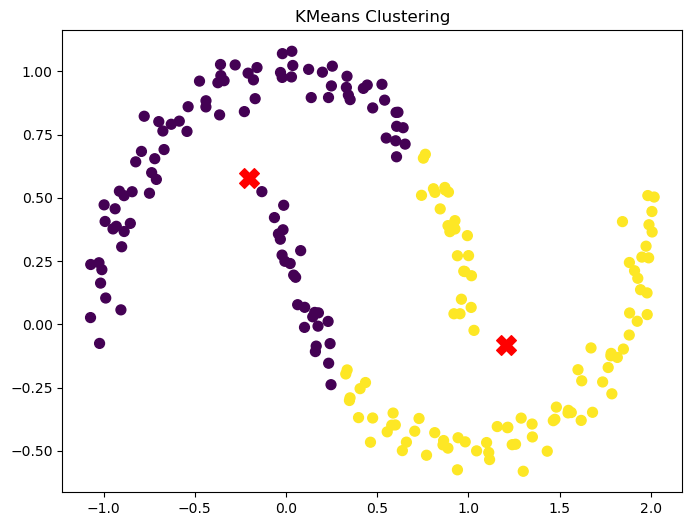

In [32]:
### Generate data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


### Fit KMeans
k_means = KMeans(n_clusters=2)

### Predict clusters
y_pred = k_means.fit_predict(X)

### Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(k_means.centroids[:, 0], k_means.centroids[:, 1], s=200, c='red', marker='X')
plt.title(f'KMeans Clustering')
plt.show()

# Conclusion
A simple version of KMeans clustering was implemented and tested against different data sets. 